In [4]:
from __future__ import print_function
import sys
sys.path.append("/users/PAS0654/osu8354/root6_18_build/lib") # go to parent dir
sys.path.append("/users/PAS0654/osu8354/ARA/AraRootBuild/lib/") # go to parent dir

from ROOT import TCanvas, TGraph
from ROOT import gROOT
import ROOT
import os
import matplotlib.pyplot as plt
# from TimingCalibration import HistPlotter2D
import numpy as np

Welcome to JupyROOT 6.18/04


## Define variables and functs

In [5]:
ch=3
run=2827

In [6]:
def HistPlotter2D_jitter(chan,runNum):
    sample = np.load('./ARA4_cal_files/samples_%i_%ifirst.npy'%(runNum,chan))
    sample_f = np.load('./ARA4_cal_files/samples_%i_%ifinal.npy'%(runNum,chan))
    jitter = np.load('./ARA4_cal_files/jitter_%i_%ifirst.npy'%(runNum,chan))
    jitter_f = np.load('./ARA4_cal_files/jitter_%i_%ifinal.npy'%(runNum,chan))

    sample_even=[]
    jitter_even = []
    sample_odd=[]
    jitter_odd = []
    sample_even_f =[]
    jitter_even_f = []
    sample_odd_f =[]
    jitter_odd_f = []


    for j in range(0,len(sample)):
        if(sample[j]%2==0):#if even
            sample_even.append(sample[j])
            jitter_even.append(jitter[j])
        else:
            sample_odd.append(sample[j])
            jitter_odd.append(jitter[j])
            
        if(sample_f[j]%2==0):#if even
            sample_even_f.append(sample_f[j])
            jitter_even_f.append(jitter_f[j])
        else:
            sample_odd_f.append(sample_f[j])
            jitter_odd_f.append(jitter_f[j])


    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    even_hist_i = ax[0,0].hist2d(sample_even,jitter_even,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]),vmin=0, vmax=70)
    ax[0,0].set_title("Even samples (no calib), run %i, ch %i"%(runNum,chan),fontsize=14)
    ax[0,0].set_ylabel("Offset [ns]",fontsize=12)
    ax[0,0].set_xlabel("Samples",fontsize=12)
    # ax[0].set_ylim(-180,180)
    fig.colorbar(even_hist_i[3],ax=ax[0,0])
    
    even_hist_f = ax[0,1].hist2d(sample_even_f,jitter_even_f,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]),vmin=0, vmax=70)
    ax[0,1].set_title("Even samples (calibrated), run %i, ch %i"%(runNum,chan),fontsize=14)
    ax[0,1].set_ylabel("Offset [ns]",fontsize=12)
    ax[0,1].set_xlabel("Samples",fontsize=12)
    fig.colorbar(even_hist_f[3],ax=ax[0,1])

    odd_hist_i = ax[1,0].hist2d(sample_odd,jitter_odd,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]),vmin=0, vmax=70)
    ax[1,0].set_title("Odd samples (no calib), run %i, ch %i"%(runNum,chan),fontsize=14)
    ax[1,0].set_ylabel("Offset [ns]",fontsize=12)
    ax[1,0].set_xlabel("Samples",fontsize=12)
    fig.colorbar(odd_hist_i[3],ax=ax[1,0])
    
    even_hist_f = ax[1,1].hist2d(sample_odd_f,jitter_odd_f,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]),vmin=0, vmax=70)
    ax[1,1].set_title("Odd samples (calibrated), run %i, ch %i"%(runNum,chan),fontsize=14)
    ax[1,1].set_ylabel("Offset [ns]",fontsize=12)
    ax[1,1].set_xlabel("Samples",fontsize=12)
    fig.colorbar(even_hist_f[3],ax=ax[1,1])

    fig.tight_layout()
    fig.savefig("timeOffset_run%i_ch%i.png"%(runNum,chan), dpi=200)

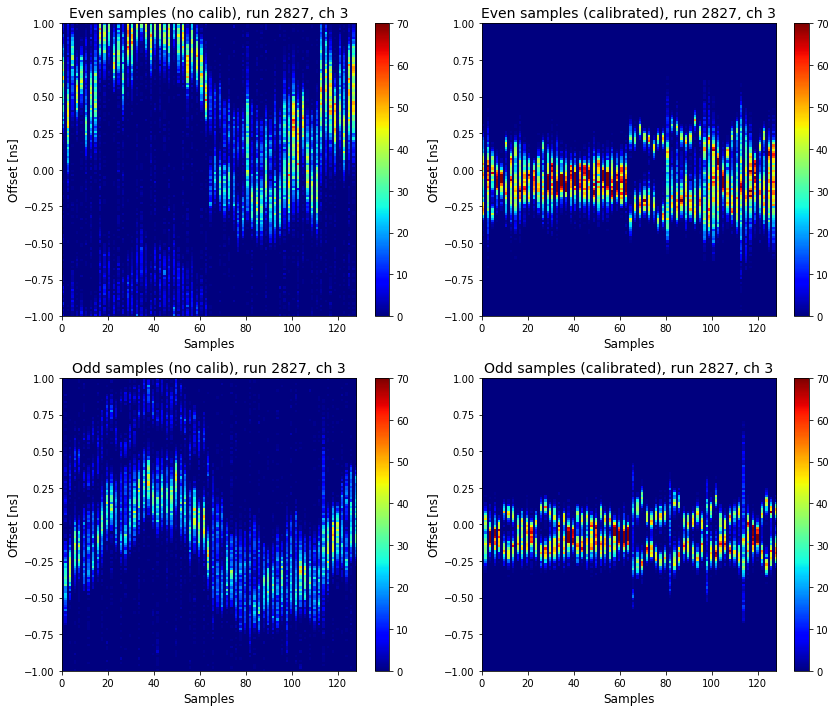

In [7]:
HistPlotter2D_jitter(ch,run)

In [ ]:

# plt.figure(facecolor='w')
# plt.hist2d(sample_even,jitter_even,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]))
# plt.title('Even Samples (no calib)')

# plt.figure(facecolor='w')
# plt.hist2d(sample_odd,jitter_odd,bins=(128,128),cmap=plt.cm.jet,range=np.array([(0.0,128.0),(-1.0,1.0)]))
# plt.title('Odd Samples (no calib)')